<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Univariate Feature Selection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Run this before any other code cell
# This downloads the csv data files into the same directory where you have saved this notebook

import urllib.request
from pathlib import Path
import os
path = Path()

# Dictionary of file names and download links
files = {'CCPP_data.csv':'https://storage.googleapis.com/aipi_datasets/CCPP_data.csv'}

# Download each file
for key,value in files.items():
    filename = path/key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)

## Regression Feature Selection
Data available at https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

The dataset contains data collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has effect on the Steam Turbine, the other three ambient variables affect the GT performance.

Features consist of hourly average ambient variables 
- AT: Ambient Temperature in °C,
- AP: Ambient Pressure in milibar,
- RH: Relative Humidity in %
- V: Exhaust Vacuum in cm Hg
- PE (target): Net hourly electrical energy output in MW  

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

In [3]:
# Read in the data
ccpp_data = pd.read_csv('CCPP_data.csv')
ccpp_data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
# Create feature matrix X and target array y
X = ccpp_data.drop('PE',axis=1)
y = ccpp_data['PE']

# Split data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("Shape of X_train, y_train:",X_train.shape,y_train.shape)
print("Shape of X_test, y_test:",X_test.shape,y_test.shape)

Shape of X_train, y_train: (7654, 4) (7654,)
Shape of X_test, y_test: (1914, 4) (1914,)


<Figure size 720x720 with 0 Axes>

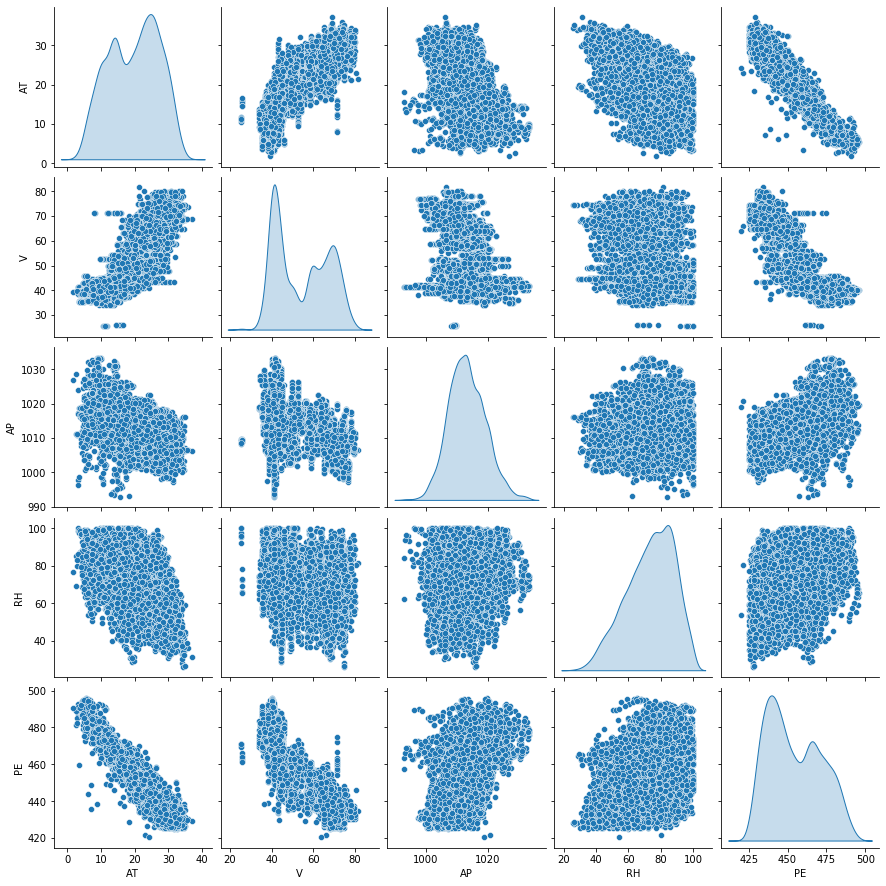

In [5]:
# Display a pairplot to look at relationships between variables
plt.figure(figsize=(10,10))
sns.pairplot(data=pd.concat([X_train,y_train],axis=1),diag_kind='kde')
plt.show()

### Univariate feature importance

In [6]:
# Evaluate continuous features using pearson's correlation coefficient (score_func = f_regression)
ftest = SelectKBest(score_func=f_regression, k='all')
ftest.fit(X_train,y_train)
f_scores = pd.DataFrame(ftest.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
f_scores = pd.concat([dfcolumns,f_scores],axis=1)
f_scores.columns = ['Feature','F-Score']  
f_scores = f_scores.sort_values(by='F-Score',ascending=False)
f_scores

,Feature,F-Score
0,AT,66948.609980
1,V,23791.861208
2,AP,2835.005994
3,RH,1354.955416


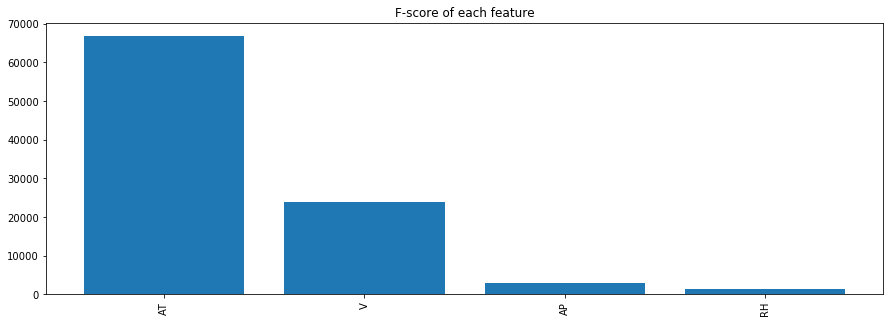

In [7]:
# Plot scores
plt.figure(figsize=(15,5))
plt.bar(x=f_scores['Feature'],height=f_scores['F-Score'])
plt.xticks(rotation=90)
plt.title('F-score of each feature')
plt.show()

### Correlation

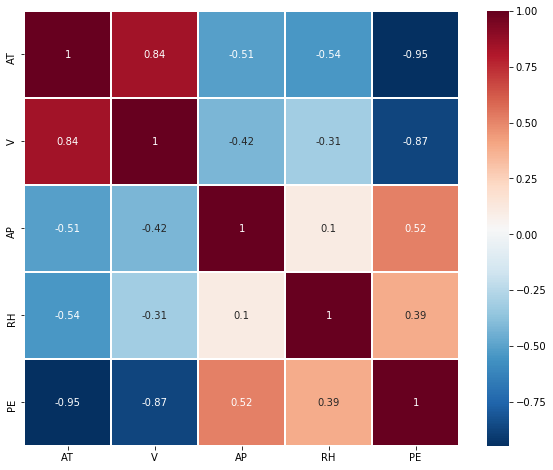

In [8]:
# Examine correlations between variables using correlation matrix
plt.figure(figsize=(10,8))
train_data = pd.concat([X_train,y_train],axis=1)
cm = train_data.corr(method='pearson')
sns.heatmap(cm, annot=True, cmap = 'RdBu_r',linewidth=0.5,square=True)
plt.show()

## Univariate feature selection - classification

In [9]:
# Load the iris dataset using a helper function in Seaborn
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### To-do
Now it's your turn.  In the cell below, do the following:
- Split the data into the input features X and target array y. Then split the X and y into training and test sets.  Use a test size of 20% and the remainder for training.  Be sure to set `random_state=0`.  
- Perform a univariate feature selection analysis on the input features in X_train.  Use an ANOVA test (`score_func=f_classif`).  Calculate the F-Score for each feature, and then plot a bar chart of the scores.

In [ ]:
### BEGIN SOLUTION ###



### END SOLUTION ###